# Prediction Salary using Level:

In [1]:
#Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [4]:
#load data
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [12]:
# independent variable: Level
X = dataset.iloc[:, 1:2].values 

#Target: Salary
y = dataset.iloc[:, 2].values

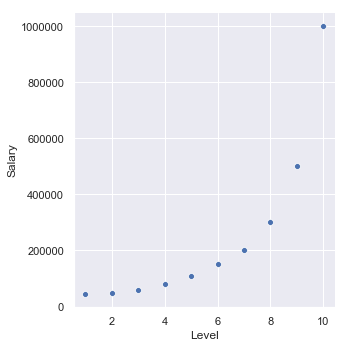

In [14]:
#Visualizing the relationship btw Level and Salary: 
sns.relplot(x='Level', y="Salary", data=dataset)
plt.show()

In [17]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

#Fitting RandomForestRegressor to the Data:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# Predicting a new result:
y_pred = regressor.predict(6.5)
y_pred

array([167000.])

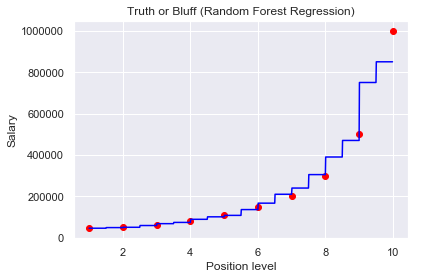

In [15]:
# Visualising the Random Forest Regression results (higher resolution)
sns.set()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [24]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)



# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

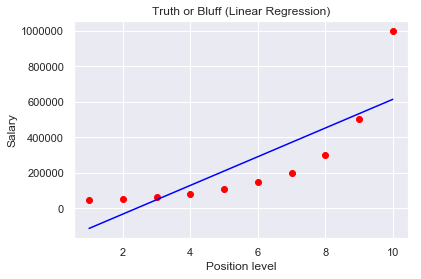

In [20]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

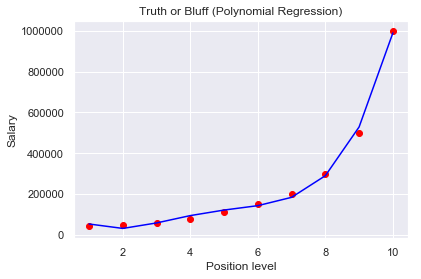

In [21]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

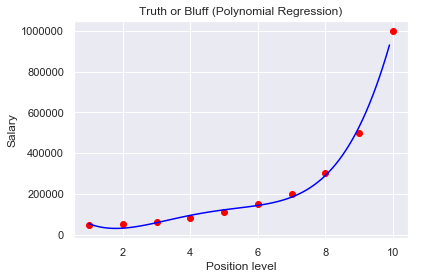

In [22]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [23]:
# Predicting a new result with Linear Regression
lin_reg.predict(6.5)

# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])